## Observations and Insights 

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_and_study = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])

# Display the data table for preview
mouse_and_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [30]:
# Checking the number of mice.
number_of_mice = mouse_and_study["Mouse ID"].count()
number_of_mice

1893

In [31]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = mouse_and_study[mouse_and_study.duplicated(["Mouse ID","Timepoint"])]
duplicate_rows["Mouse ID"]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [32]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_and_study.drop_duplicates(subset=["Mouse ID","Timepoint"], keep='last')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
# Checking the number of mice in the clean DataFrame.
clean_number_of_mice = clean_df["Mouse ID"].count()
clean_number_of_mice

1888

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


#Mean
mean_volume = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mean_volume

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.382993
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [36]:
#Median
median_volume = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
median_volume

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.783528
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [37]:
#Variance
variance_volume = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
variance_volume

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.220205
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [38]:
#Standard Deviation
std_dev_volume = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
std_dev_volume

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.574208
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [39]:
#SEM (standard error of mean)
sem_volume = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
sem_volume

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.526358
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [40]:
# Index Drug Regimen Name on Complete Data
index_regimen = clean_df.set_index(["Drug Regimen"])
index_regimen

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
Naftisol,z969,Male,9,30,25,63.145652,2
Naftisol,z969,Male,9,30,30,65.841013,3
Naftisol,z969,Male,9,30,35,69.176246,4


In [41]:
# Assemble the resulting series into a single summary dataframe.

drug_regimen_df = pd.DataFrame({"Mean Tumor Volume": mean_volume,
                                "Median Tumor Volume": median_volume,
                                "Variance Tumor Volume": variance_volume,
                                "Standard Deviation": std_dev_volume,
                                "SEM": sem_volume})
drug_regimen_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


agg_df=clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

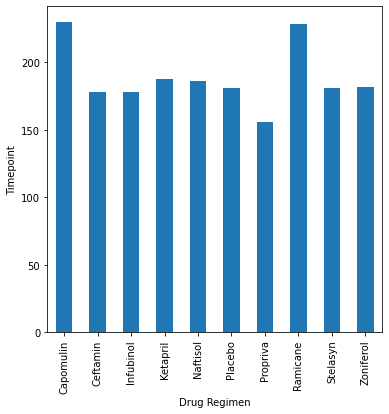

<Figure size 432x288 with 0 Axes>

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count_time = clean_df.groupby('Drug Regimen')
count_timepoint = count_time['Timepoint'].count()
# count_timepoint
count_chart = count_timepoint.plot(kind='bar', figsize=(6,6))
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Timepoint")
plt.show()
plt.tight_layout()

In [44]:
count_timepoint

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

Text(0, 0.5, 'Total Number of Timepoints')

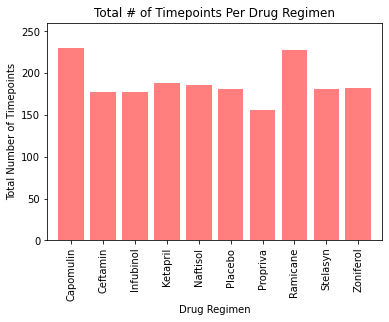

In [45]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
tp = [230,178,178,188,186,181,156,228,181,182]
x_axis = np.arange(len(tp))
plt.bar(x_axis, tp, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation=90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(tp)+30)
plt.title("Total # of Timepoints Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")

In [46]:
count_sex = clean_df.groupby('Sex')
count_sex_of_mice = count_sex['Timepoint'].count()
count_sex_of_mice

Sex
Female    930
Male      958
Name: Timepoint, dtype: int64

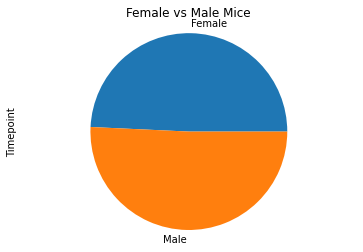

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
## use the 'Sex' column and pandas to create Pie, day 2 activity 5

mice_pie = count_sex_of_mice.plot(kind="pie", y='Sex', title=("Female vs Male Mice"), )

plt.axis("equal")
plt.show()


([<matplotlib.patches.Wedge at 0x150a87eb160>,
 [Text(-0.7925485910066415, -0.9010364758950591, 'Female'),
  Text(0.7265029524204479, 0.8259500348836922, 'Male')],
 [Text(-0.4623200114205409, -0.5256046109387844, '49.3%'),
  Text(0.39627433768388065, 0.4505182008456502, '50.7%')])

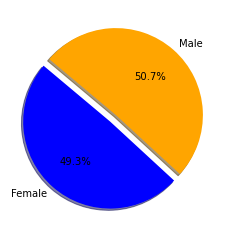

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
## same data, but use matplotlib Day 1 Activity 9
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [930, 958]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
## pandas day 1 activity 11 
## you may want to reset the index to make it easier to work with.
max_time = mouse_and_study.groupby('Mouse ID')['Timepoint'].max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
## Pandas day 3 activity 1
last_timepoint = pd.merge(mouse_and_study, max_time, how='right')
last_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
40317,y769,Ceftamin,Female,6,27,45,68.594745,4
40318,y865,Ceftamin,Male,23,26,45,64.729837,3
40319,z581,Infubinol,Female,24,25,45,62.754451,3
40320,z795,Naftisol,Female,13,29,45,65.741070,3


In [50]:
# Put treatments into a list for for loop (and later for plot labels)
## The treatment names are in the instructions.
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
## this will be a loop through each treatment.

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    ## using lock create a dataframe with the tumor volumes('Tumor Volume (mm3)) for each drug
tumor_volume = last_timepoint.loc[(last_timepoint['Drug Regimen'] == 'Capomulin')|
                                        (last_timepoint['Drug Regimen'] == 'Ramicane')|
                                        (last_timepoint['Drug Regimen'] == 'Infubinol')|
                                        (last_timepoint['Drug Regimen'] == 'Ceftamin')]
tumor_volume_df = tumor_volume['Tumor Volume (mm3)']
    # add subset 
    ## append it to the empty list
quartiles = tumor_volume_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    ## matplotlib day 3 activity 2
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 14.168559344999998 could be outliers.
Values above 76.68976290500001 could be outliers.


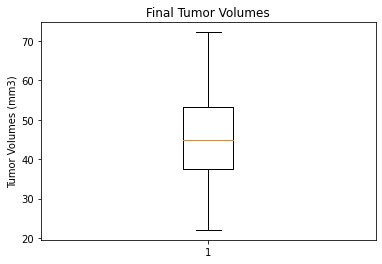

In [51]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
## matplotlib day 3 activity 2
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes')
ax1.set_ylabel('Tumor Volumes (mm3)')
ax1.boxplot(tumor_volume_df)
plt.show()

## Line and Scatter Plots

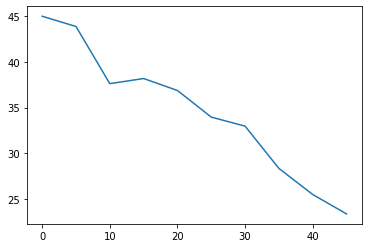

In [52]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
## use loc to filter data down to a specific mouse and the treatment Capomulin
line_plot = mouse_and_study.loc[mouse_and_study['Mouse ID']=='s185',:]
plt.plot(line_plot['Timepoint'],line_plot['Tumor Volume (mm3)'])


<function matplotlib.pyplot.show(close=None, block=None)>

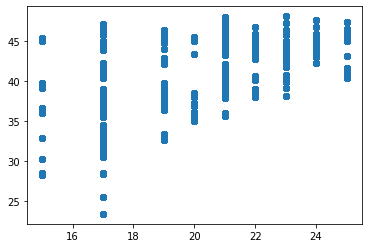

In [53]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
## same loc as above but second data point is an Average from the filtered data.
capomulin = tumor_volume.loc[tumor_volume['Drug Regimen']=='Capomulin']
x_values = capomulin['Weight (g)']
y_values = capomulin['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.show

## Correlation and Regression

The correlation between weight and final tumor is 0.63


<function matplotlib.pyplot.show(close=None, block=None)>

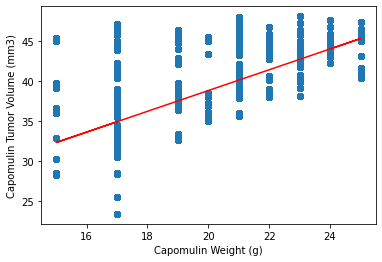

In [60]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
## matplotlib day 3 activity 6+
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between weight and final tumor is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.xlabel('Capomulin Weight (g)')
plt.ylabel('Capomulin Tumor Volume (mm3)')
plt.show